# Titanic: Machine Learning from Disaster

The following project is my solution for Kaggle's "Titanic: Machine Learning from Disaster" project. The primary goals I hope to accomplish is to utilize and demonstrate traditional Machine Learning methods. More information about this project can be found at: https://www.kaggle.com/c/titanic.  

I am going to try a variety of approaches starting with one that I have worked on in the past (found here at https://github.com/rohitvinnakota/Investigating-Titanic-Data). I will be using my initial prediction as a foundation to test other ML methods on. I will be using the scikit-learn python library to handle the majority of my number crunching. There are 2 datasets provided. The "training set" and the "testing set". The training set is used to derive models and estimations from and the test set is used to see how accurately the derived model can predict whether a passenger survived or not. To start with, let us import the test set into our code and see what it looks like. We can use libraries such as NumPy or Pandas in Python to do so.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


#Reading the training data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#Getting an overview of what data looks like
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From a quick glance at the data and referencing Kaggle. We have the following variables to work with:

1) PassengerId: Unique ID for each passenger 

2) Survived: 0 = No, 1 = Yes

3) Pclass:  1st = Upper
            2nd = Middle
            3rd = Lower
            
            This refers to the socio economic status of the passenger


4) Age

5) SibSp: Number of siblings and/or spouses for the passenger

6) Parch: Number of parents and/or children for the passenger

7) Fare


We can generate 3 charts to see the association between age, gender, and class on survival. First, let us check each of these independently. While there are other variables, they either have too much missing data or are irrelevant to the data at hand(Cabin, Embarket, Ticket, Name).

[Text(0,0.5,'Percentile that survived'), Text(0.5,0,'Class')]

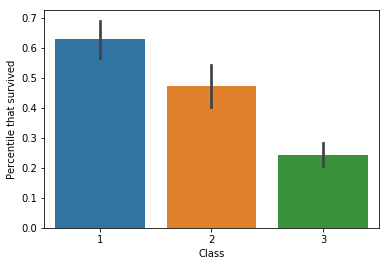

In [2]:
import warnings
warnings.filterwarnings('ignore')

g1 = sns.barplot(data =train_data,x='Pclass',y='Survived')
g1.set(xlabel = 'Class', ylabel = 'Percentile that survived')

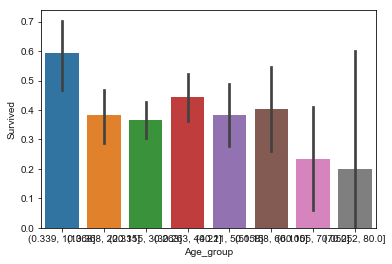

In [3]:
train_data['Age_group'] = pd.cut(train_data['Age'], bins= 8, include_lowest=True)
g2 = sns.barplot(data =train_data,x='Age_group',y='Survived',orient =0)
sns.set_context("poster",font_scale=1)
sns.set(rc={'figure.figsize':(1,8.27)})

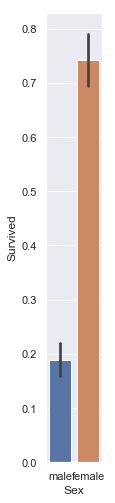

In [4]:
sns.barplot(data = train_data, x='Sex',y='Survived')
sns.set(rc={'figure.figsize':(4,5)})

As we can see from the data above, children under the age of 10, class 1, and females have the highest chance of survival. 

Note that this project is an example of supervised learning. i.e. there is training data that already exists and our model relies on insights gained from said data. We can approach this using either a regression based approach or a classification based approach. Since our target variable (Survived) is categorical, a classification based one seems to be the most appropriate. To begin with, let us construct a simple decision tree using sklearn

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz


transformed_train = pd.get_dummies(train_data, columns=['Sex'])
#Prevent NaN errors, also fill our missing age values with the mean age to 
#hopefully normalize. If the accuracy is too low, we can tweak this value later
transformed_train['Age'] = transformed_train['Age'].fillna(train_data.Age.mean())
transformed_test = pd.get_dummies(test_data, columns=['Sex'])
transformed_test['Age'] = transformed_test['Age'].fillna(test_data.Age.mean())
model = DecisionTreeClassifier(random_state = 1)
transformed_train.head()
feature_set = ['Sex_female', 'Sex_male', 'Age', 'Pclass']
model.fit(transformed_train[feature_set], transformed_train['Survived'])
#We have to assign numerical values to our categorial variables to prevent
# ValueErros from the DecisionTreeClassifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

Our Simple Decision Tree Classifier has been fed the sample data. Note that the number of samples has been reduced to 183 from 891 since we had to drop a lot of NaN age values. Regardless, this provides us a starting point to test our first ML algorithm before looking at further improvements. Generating the predicted values for our test observations looks like: 

In [6]:
predictedTest = model.predict(transformed_test[feature_set])
#Create new df and add to CSV
passengers = transformed_test['PassengerId']
df2 = pd.DataFrame(predictedTest,passengers,columns = ['Survived'])
print(df2)
df2.to_csv("submit.csv", index_label = "PassengerId")

             Survived
PassengerId          
892                 0
893                 0
894                 1
895                 1
896                 1
897                 0
898                 0
899                 0
900                 0
901                 0
902                 0
903                 0
904                 1
905                 1
906                 1
907                 1
908                 0
909                 0
910                 1
911                 0
912                 0
913                 0
914                 1
915                 0
916                 1
917                 0
918                 1
919                 0
920                 0
921                 0
...               ...
1280                0
1281                1
1282                1
1283                1
1284                1
1285                0
1286                0
1287                1
1288                0
1289                1
1290                0
1291                0
1292      

Upon submission, the score of the solution was **0.72727**. We can incestigate possible ways to make this better. For this project, I am going to try one other method. Random forests. In a simple sense, random forests build multiple decision trees and combine them to generate the final result. Before doing that, let us explore additional data for further possible insights. I will include the SibSp, Parch, and Fare variables for further analysis. 

In [7]:
from sklearn.ensemble import RandomForestClassifier

train_data.SibSp.describe()

C:\Users\Vinnakotas\Anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [8]:
train_data.Parch.describe()


count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [9]:
train_data.Fare.describe()
#test_data.Fare.describe()
#Test data is missing fare for one passenger. Fill this in 
transformed_test['Fare'] = transformed_test['Fare'].fillna(transformed_test.Fare.mean())
featureSet2 = ['Sex_female', 'Sex_male', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch']
forestPredict = RandomForestClassifier(n_estimators=1000)
forestPredict.fit(transformed_train[featureSet2], transformed_train['Survived'])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
passengers = transformed_test['PassengerId']
predictedForest =  forestPredict.predict(transformed_test[featureSet2])
df2 = pd.DataFrame(predictedForest,passengers,columns = ['Survived'])
print(df2)
df2.to_csv("submit2.csv", index_label = "PassengerId")

             Survived
PassengerId          
892                 0
893                 0
894                 1
895                 1
896                 0
897                 0
898                 0
899                 0
900                 1
901                 0
902                 0
903                 0
904                 1
905                 0
906                 1
907                 1
908                 0
909                 1
910                 0
911                 0
912                 0
913                 1
914                 1
915                 0
916                 1
917                 0
918                 1
919                 1
920                 1
921                 0
...               ...
1280                0
1281                0
1282                0
1283                1
1284                0
1285                0
1286                0
1287                1
1288                0
1289                1
1290                0
1291                0
1292      

This returns a slightly improved score of **0.74162**. 

In conclusion, I obtained a **74%** accuracy score for predicting the survival rate of Titanic Passengers using the methods outlined so far. It is important to note that this is just an initial investigation into analyzing and understanding the data. Further feature scaling is highly important to improve the score. Some ideas include combining the SibSp and Parch rows, filling in the missing ages using grouped averages rather than whole averages, including all variables, assigning weights to our variable, and trying different ML algorithms. 

#### Sources

https://www.kaggle.com/dansbecker/your-first-machine-learning-model

https://towardsdatascience.com/types-of-machine-learning-algorithms-you-should-know-953a08248861

https://scikit-learn.org/stable/modules/tree.html

https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree

https://en.wikipedia.org/wiki/Feature_scaling

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://stackoverflow.com/questions/27817994/visualizing-decision-tree-in-scikit-learn

https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f?gi=486d7bf29d5f

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html